Домашняя работа к лекции 1 по курсу Рекомендательные системы.
---------
**Введение и классификация рекомендательных систем**

Студента: **Помойницкого Евгения**

Группа: **DS 8**

**Задание**

Постройте топ фильмов в категориях Action и Comedy

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [86]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Напрашивается самым простым образом отфильтровать датафрейм по **значению 'Comedy'**, например, вот так:

In [87]:
movies[ movies['genres'] == 'Comedy'].head()

,movieId,title,genres
4,5,Father of the Bride Part II (1995),Comedy
17,18,Four Rooms (1995),Comedy
18,19,Ace Ventura: When Nature Calls (1995),Comedy
58,65,Bio-Dome (1996),Comedy
61,69,Friday (1995),Comedy


Но при этом не учтется, что многие фильмы отнесены к нескольким жанрам. Правильнее будет отфильровать вот так:

In [88]:
movies[movies['genres'].apply(lambda x: 'Comedy' in str(x))]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance
...,...,...,...
9732,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi
9734,193571,Silver Spoon (2014),Comedy|Drama
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy


In [89]:
movies_comedy = movies[movies['genres'].apply(lambda x: 'Comedy' in str(x))]

In [95]:
mov_comedy_ratings = movies_comedy.join(ratings.set_index('movieId'), on='movieId')
mov_comedy_ratings.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09


In [117]:
ratings_top = mov_comedy_ratings.groupby(['movieId', 'title', 'genres'])[['rating']].sum().sort_values('rating',
                                                                                                       ascending=False)
ratings_top.reset_index(inplace=True)
ratings_top.head(10)

,movieId,title,genres,rating
0,356,Forrest Gump (1994),Comedy|Drama|Romance|War,1370.0
1,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1288.5
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,843.0
3,608,Fargo (1996),Comedy|Crime|Drama|Thriller,745.0
4,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,694.0
5,1270,Back to the Future (1985),Adventure|Comedy|Sci-Fi,690.5
6,4306,Shrek (2001),Adventure|Animation|Children|Comedy|Fantasy|Ro...,657.5
7,380,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller,622.5
8,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,601.0
9,1580,Men in Black (a.k.a. MIB) (1997),Action|Comedy|Sci-Fi,575.5


#### Таким образом, получили ТОП 10 фильмов на основании рейтингов для фильмов, для которых указано 'Comedy' в качестве единственного или одного из жанров.

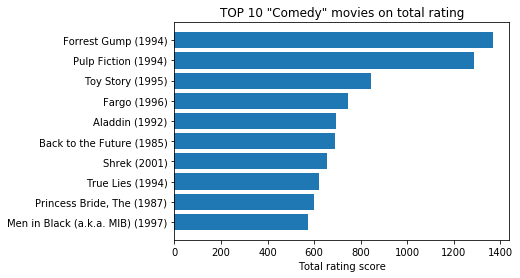

In [156]:
plt.barh(y=ratings_top.head(10)['title'], width=ratings_top.head(10)['rating'])
plt.xlabel('Total rating score')
plt.title('TOP 10 "Comedy" movies on total rating')
plt.gca().invert_yaxis()
plt.show()

In [118]:
tags_count = tags.groupby('movieId')[['tag']].count()
tags_count.reset_index(inplace=True)
tags_count.head()

,movieId,tag
0,1,3
1,2,4
2,3,2
3,5,2
4,7,1


In [129]:
mov_comed_ratings_tags = ratings_top.merge(tags_count, on='movieId').sort_values('tag', ascending=False)
mov_comed_ratings_tags.reset_index(inplace=True)
mov_comed_ratings_tags.head(10)

,index,movieId,title,genres,rating,tag
0,1,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1288.5,181
1,20,1732,"Big Lebowski, The (1998)",Comedy|Crime,416.0,32
2,311,71899,Mary and Max (2009),Animation|Comedy|Drama,42.0,13
3,177,5673,Punch-Drunk Love (2002),Comedy|Drama|Romance,119.5,13
4,161,61323,Burn After Reading (2008),Comedy|Crime|Drama,136.0,11
5,21,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,414.0,10
6,0,356,Forrest Gump (1994),Comedy|Drama|Romance|War,1370.0,9
7,262,88405,Friends with Benefits (2011),Comedy|Romance,61.0,9
8,28,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,374.5,8
9,30,2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War,365.0,8


#### Так выглядит рейтинг фильмов по количеству тэгов. Опять же, для фильмов,  для которых указано 'Comedy' в качестве единственного или одного из жанров.

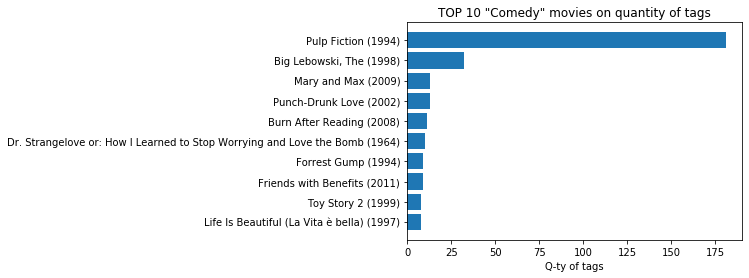

In [157]:
plt.barh(y=mov_comed_ratings_tags.head(10)['title'], width=mov_comed_ratings_tags.head(10)['tag'])
plt.xlabel('Q-ty of tags')
plt.title('TOP 10 "Comedy" movies on quantity of tags')
plt.gca().invert_yaxis()
plt.show()

### Действуем аналогичным образом для жанра 'Action'

In [163]:
movies_action = movies[movies['genres'].apply(lambda x: 'Action' in str(x))]
mov_action_ratings = movies_action.join(ratings.set_index('movieId'), on='movieId')
ratings_act_top = mov_action_ratings.groupby(['movieId', 'title', 'genres'])[['rating']].sum().sort_values('rating',
                                                                                                       ascending=False)
ratings_act_top.reset_index(inplace=True)

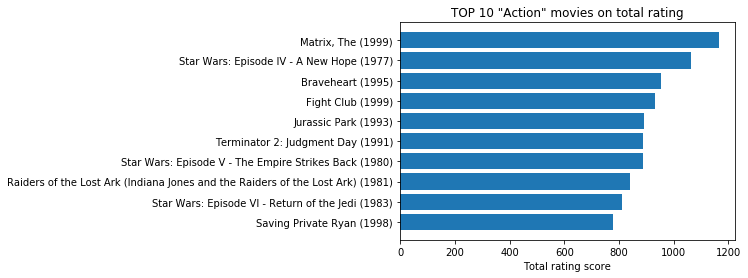

In [164]:
plt.barh(y=ratings_act_top.head(10)['title'], width=ratings_act_top.head(10)['rating'])
plt.xlabel('Total rating score')
plt.title('TOP 10 "Action" movies on total rating')
plt.gca().invert_yaxis()
plt.show()

In [168]:
mov_action_ratings_tags = ratings_act_top.merge(tags_count, on='movieId').sort_values('tag', ascending=False)
mov_action_ratings_tags.reset_index(inplace=True)

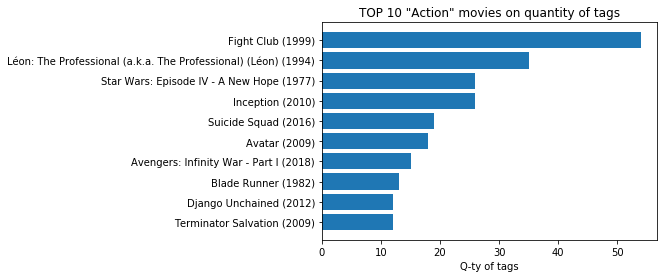

In [169]:
plt.barh(y=mov_action_ratings_tags.head(10)['title'], width=mov_action_ratings_tags.head(10)['tag'])
plt.xlabel('Q-ty of tags')
plt.title('TOP 10 "Action" movies on quantity of tags')
plt.gca().invert_yaxis()
plt.show()

#### Таким образом, мы получили ТОП 10 фильмов в категориях 'Comedy' и 'Action', для фильмов для которых указаны эти категориии в качестве единственного или одного из жанров.